[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xjl1uHiSPMCxbofMjyRljVsNX9JTfaZ6#scrollTo=bSJ8TMsdrujn)

# **Image/Multiclass Classification - Fully Connected Dense Neural Network**

## **The Fashion MNIST dataset**

`Fashion-MNIST` is a dataset of images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend `Fashion-MNIST` to serve as a direct drop-in replacement for the original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example of how the data looks (each class takes three-rows):


![Fashion MNIST](https://github.com/ravichandrakorivi/deep-learning-code/raw/main/images/fashion-mnist-sprite.png)

## **Labels**

Each training and test example is assigned to one of the following labels:

| Label | Description |
|:------:|:-------------|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the seeds of different random number generators so that the results
# will be the same every time the network is run
keras.utils.set_random_seed(42)

Luckily for us, this dataset is avaialable in a convenient format through Keras, so we will load it and take a look.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


There are 60000 images in the training set, each of which is a 28x28 matrix.

In [ ]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


The reamining 10000 images are in the test set, each of which is a 28x28 matrix.

Let's look at the first 10 rows of the dependent variable y.

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Let's create a Python list so that we can go from numbers to descriptions easily.

In [ ]:
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"
]

Given a number, the description is now a simple look-up. Let's see what the very first training example is about.

In [ ]:
labels[y_train[0]]

'Ankle boot'

The very first image is an "Ankle boot!"
Let's take a look at the raw data for the image.

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Let's look at the first 25 images.

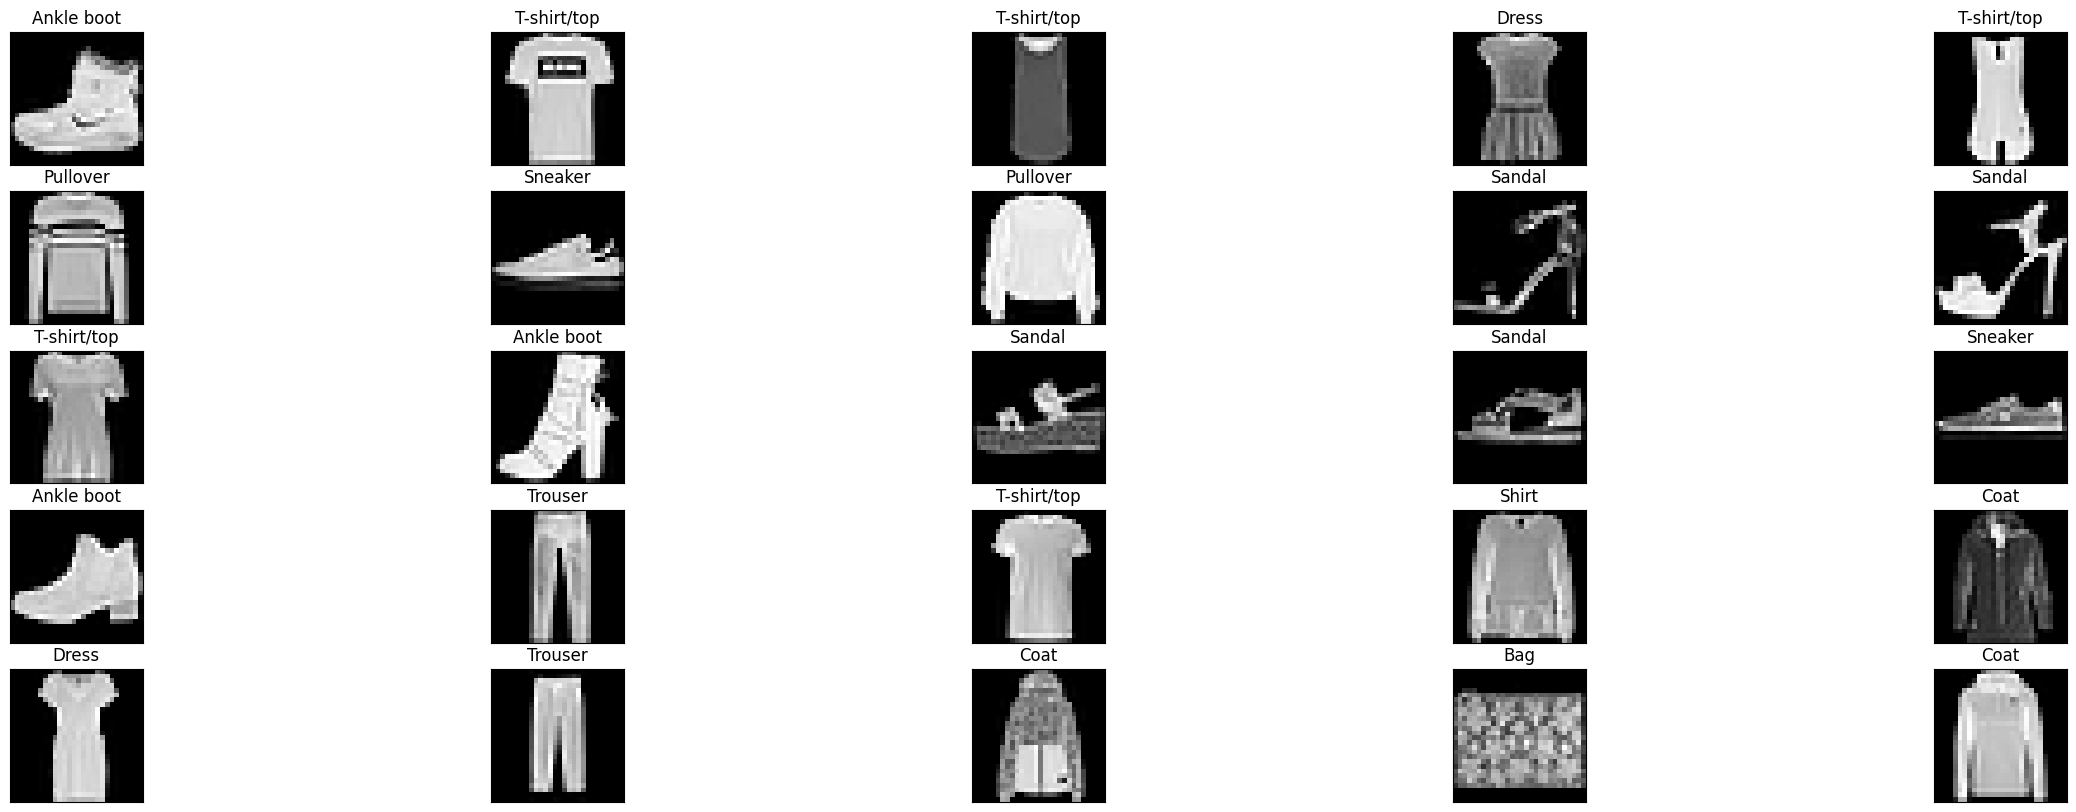

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(30, 10))
for i in range(25):
    axc = ax[i//5, i%5]
    axc.imshow(x_train[i].squeeze(), cmap="gray")
    axc.set_title(labels[int(y_train[i])])
    axc.set_xticks([])
    axc.set_yticks([])

## **Neural Network model**

## **Data Preparation**

**Tip**: NNs learn best when each independent variable is in a small range. So, standardize them by either
- subtracting the mean and dividing by the standard deviation or
- if they are in a guaranteed range, just divide by the max value.

The inputs here range from 0 to 255. Let's normalize to the 0-1 range by dividing everything by 255.

In [ ]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

## **Define Model in Keras**
* The input will be 28 x 28 matrices of numbers. These will have to be *flattened* into a long vector and then fed to the next layer.
* We will use just a single hidden layer.
* Since this is a *multi-class classification problem* (e.g., we need to predict one of 10 clothing categories), the output layer has to produce a 10-element vector of probabilities that sum up to 1.0  => we will use the *softmax* layer.

![NN Architectire](https://github.com/ravichandrakorivi/deep-learning-code/raw/main/images/image_classification_fashion_mnist_architecture.png)

In [ ]:
# define the input layer
input = keras.Input(shape=(28,28))

# convert the 28 x 28 matrix of numbers into a loooooooong vector
h = keras.layers.Flatten()(input)

# feed the long vector to the hidden layer
h = keras.layers.Dense(256, activation="relu", name="Hidden")(h)

# feed the output of the hidden layer to the output layer
output = keras.layers.Dense(10, activation="softmax", name="Output")(h)

# tell Keras that this (input,output) pair is your model
model = keras.Model(input, output)

The `model.summary()` command is a good way to get a quick overview of what you have defined.

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Let's hand-calculate the number of parameters to verify.

In [ ]:
(784*256 + 256) + (256*10 + 10)

203530

We can "visualize" the network graphically as well using Keras' `plot_model` function.

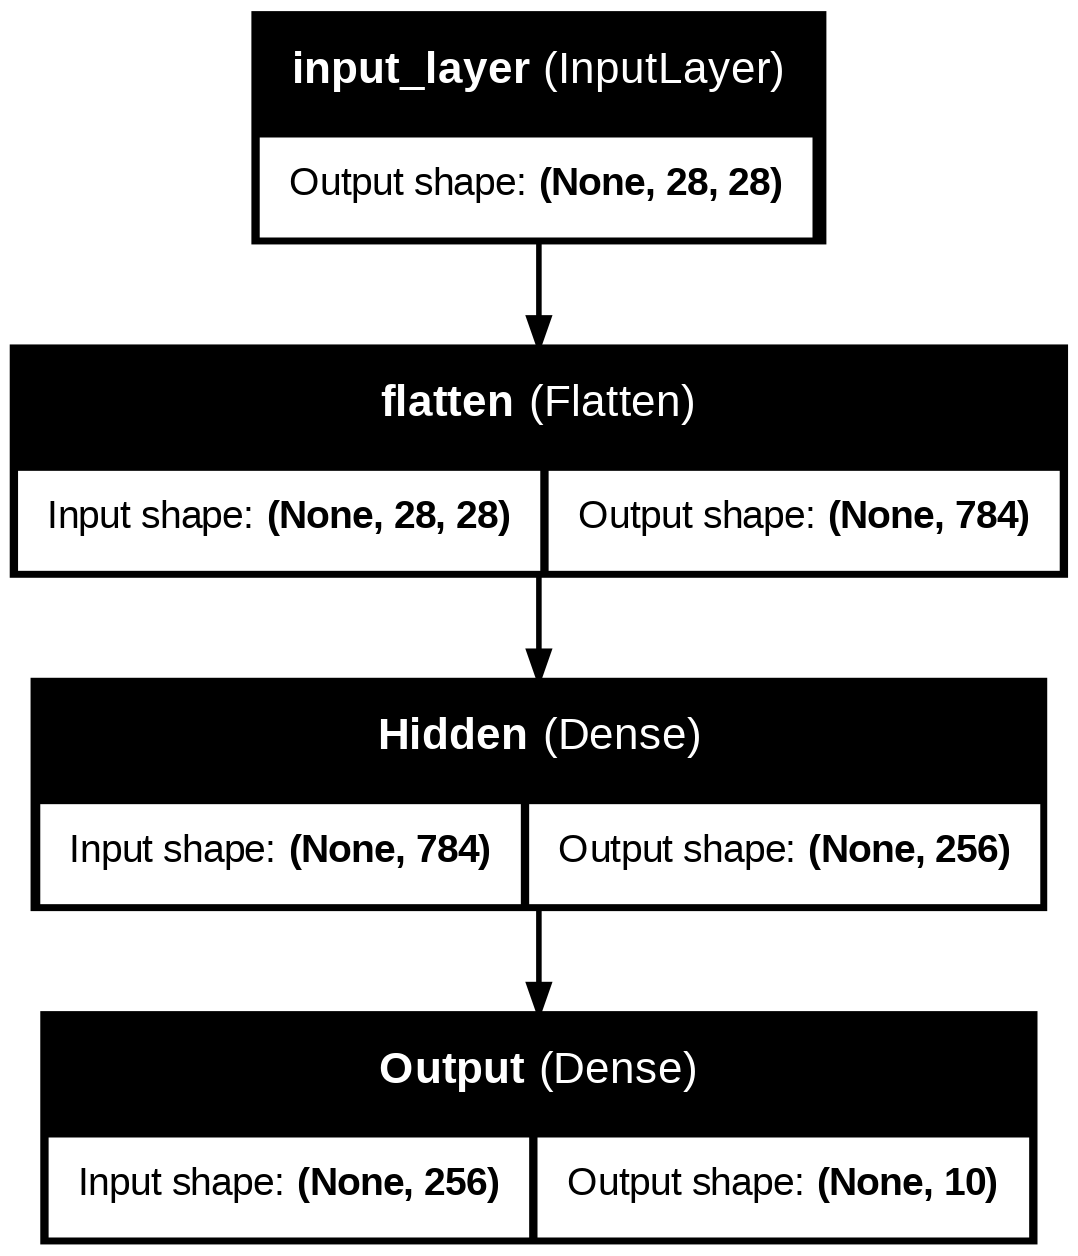

In [ ]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## **Set Optimization Parameters**

Now that the model is defined, we need to tell Keras three things:

*   What **loss function** to use
*   Which **optimizer** to use - we will again use **Adam** which is an excellent set-and-forget choice
*   What **metrics** you want Keras to report out - in classification problems like this one, Accuracy is usually the metric you want to see.

Since our output variable is categorical with 10 levels, we will select the `sparse_categorical_crossentropy` loss function.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

### Train the Model!

* The *batch size*: 32 or 64 are commonly used.
* The number of *epochs* i.e., how many passes through the training data: we will start with 20.
* To check for overfitting, we will ask Keras to automatically use 20% of the training data points as a validation set.

OK, let's train the model using the `model.fit` function!

In [ ]:
batch_size = 64
epochs = 20

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7676 - loss: 0.6644 - val_accuracy: 0.8565 - val_loss: 0.4108
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8596 - loss: 0.3972 - val_accuracy: 0.8664 - val_loss: 0.3755
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8751 - loss: 0.3491 - val_accuracy: 0.8727 - val_loss: 0.3553
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8846 - loss: 0.3191 - val_accuracy: 0.8783 - val_loss: 0.3455
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8920 - loss: 0.2977 - val_accuracy: 0.8825 - val_loss: 0.3393
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8973 - loss: 0.2796 - val_accuracy: 0.8820 - val_loss: 0.3429
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9024 - loss: 0.2644 - val_accuracy: 0.8820 - val_loss: 0.3409
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9076 - loss: 0.2520 - val_accuracy: 0.

Let's plot the loss and accuracy curves to see if ***overfitting*** is going on and if **early stopping** may be needed.

In [ ]:
def plot_loss_curves(history):
  plt.clf()
  history_dict = history.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)
  plt.plot(epochs, loss_values, "bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [ ]:
def plot_acc_curves(history):
  plt.clf()
  history_dict = history.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

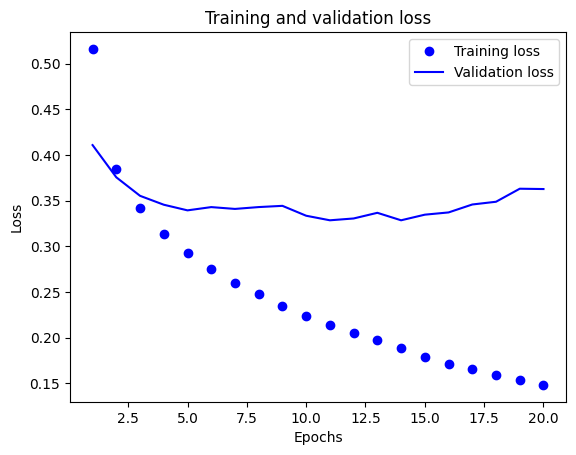

In [ ]:
plot_loss_curves(history)

Do you think there's overfitting?

If you think there's overfitting at epoch N, we could go back, re-initialize the model and just run it for  N epochs - that would be an example of **early stopping**.

Let's look at the accuracy curves as well.

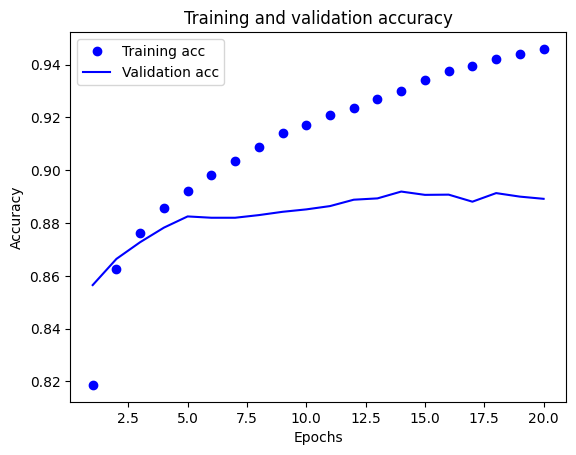

In [ ]:
plot_acc_curves(history)

What do you think? Are we overfitting?

## **Evaluate the Model**
Let's see how well the model does on the test set.

In [ ]:
model.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9358 - loss: 0.1715


[0.20879755914211273, 0.9265000224113464]

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8823 - loss: 0.3823


[0.39565277099609375, 0.8810999989509583]

**Is this impressive? What's a good baseline to compare it to?**
Baseline model would be to assume one of the categories all the time and hence, baseline model;s accuracy is 10%.

### If we want to add a **second** hidden layer, how easy is it?

In [ ]:
# define the input layer
input = keras.Input(shape=(28,28))

# convert the 28 x 28 matrix of numbers into a long vector
h = keras.layers.Flatten()(input)

# feed the long vector to the first hidden layer
h = keras.layers.Dense(256, activation="relu", name="Hidden_1")(h)

# THIS IS THE ADDITIONAL LINE
# feed the output of the first hidden layer to the second hidden layer
h = keras.layers.Dense(256, activation="relu", name="Hidden_2")(h)

# feed the output of the second hidden layer to the output layer
output = keras.layers.Dense(10, activation="softmax", name="Output")(h)


# tell Keras that this (input,output) pair is your model
model = keras.Model(input, output)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

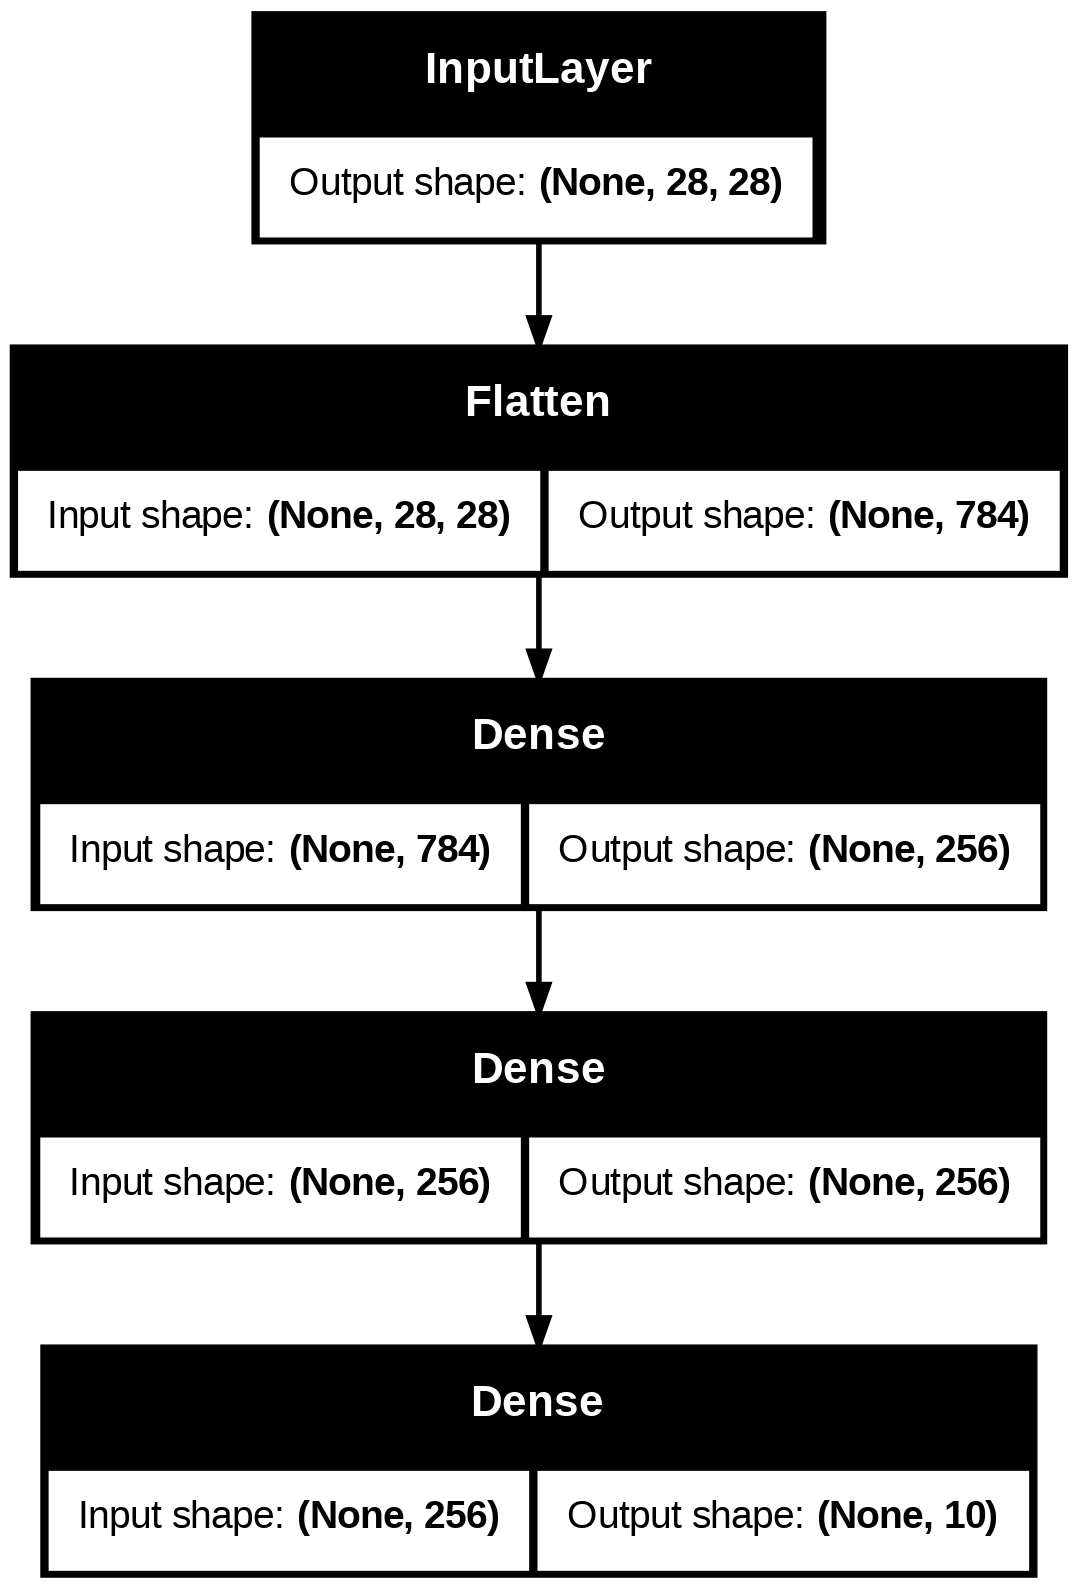

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

batch_size = 64
epochs = 20

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7734 - loss: 0.6416 - val_accuracy: 0.8563 - val_loss: 0.3988
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8635 - loss: 0.3789 - val_accuracy: 0.8681 - val_loss: 0.3677
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8778 - loss: 0.3315 - val_accuracy: 0.8712 - val_loss: 0.3641
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8863 - loss: 0.3066 - val_accuracy: 0.8748 - val_loss: 0.3554
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8950 - loss: 0.2838 - val_accuracy: 0.8745 - val_loss: 0.3515
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9014 - loss: 0.2656 - val_accuracy: 0.8760 - val_loss: 0.3615
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9053 - loss: 0.2534 - val_accuracy: 0.8724 - val_loss: 0.3748
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9096 - loss: 0.2393 - val_accuracy: 0.

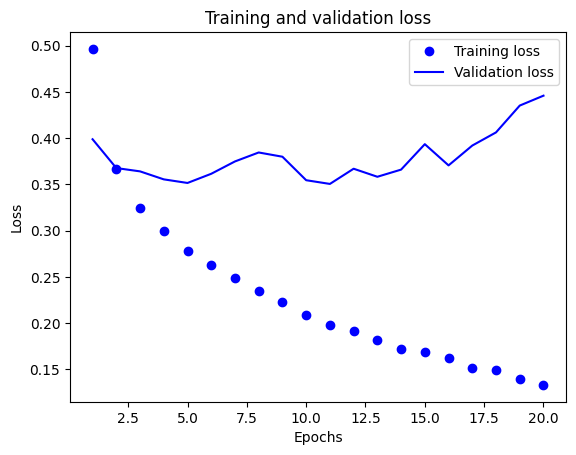

In [ ]:
plot_loss_curves(history)

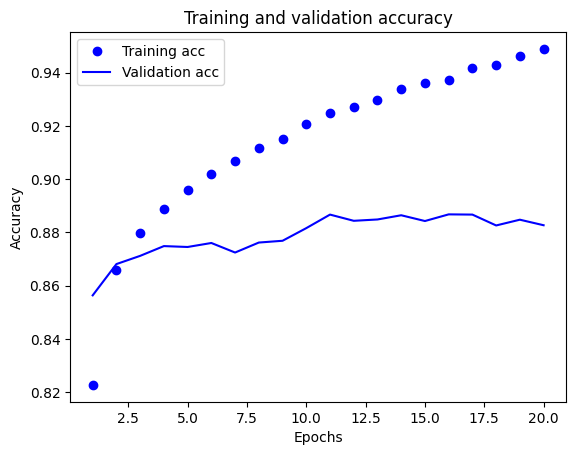

In [ ]:
plot_acc_curves(history)

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8788 - loss: 0.4769


[0.4747677743434906, 0.8790000081062317]